In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from matplotlib.collections import LineCollection
import random

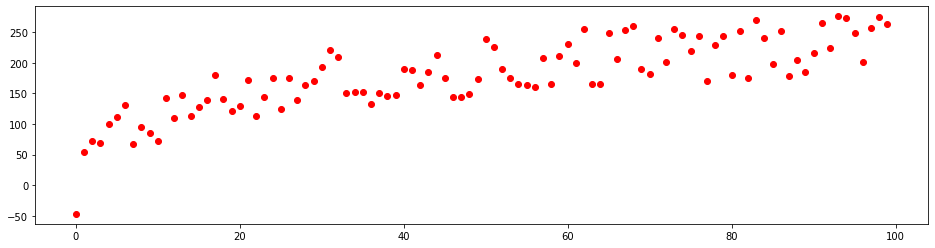

In [5]:
n=100
x=np.arange(n)
y= 50*np.log(1+x) + np.random.randint(-50,50,size=(n,))
plt.figure(figsize=(16,4))
plt.scatter(x,y,color="red")
plt.show()

In [6]:
ir=IsotonicRegression()
lr=LinearRegression()
y_ir=ir.fit_transform(x,y)
lr.fit(x[:,np.newaxis],y)

LinearRegression()

Text(0.5, 1.0, 'Isotonic Regression')

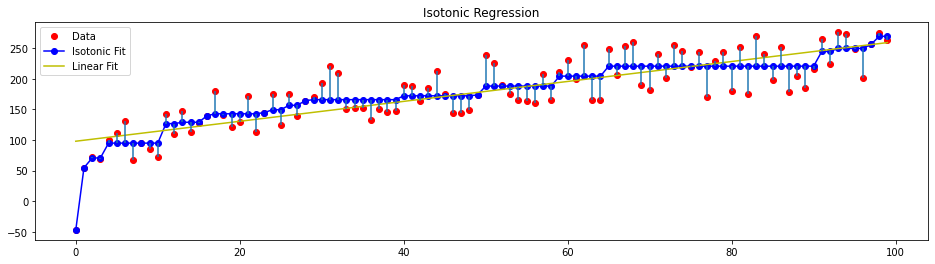

In [7]:
lines=[[[i,y[i]],[i,y_ir[i]]] for i in range(n)]
lc=LineCollection(lines)
plt.figure(figsize=(16,4))
plt.plot(x,y,'r.',markersize=12)
plt.plot(x,y_ir,'b.-',markersize=12)
plt.plot(x,lr.predict(x[:, np.newaxis]), 'y-')
plt.gca().add_collection(lc)
plt.legend(('Data','Isotonic Fit','Linear Fit'))
plt.title("Isotonic Regression")

In [36]:
n=10
x=np.arange(n)
y= 50*np.log(1+x) + np.random.randint(-50,50,size=(n,))
y_ir=ir.fit_transform(x,y)
lr.fit(x[:,np.newaxis],y)

LinearRegression()

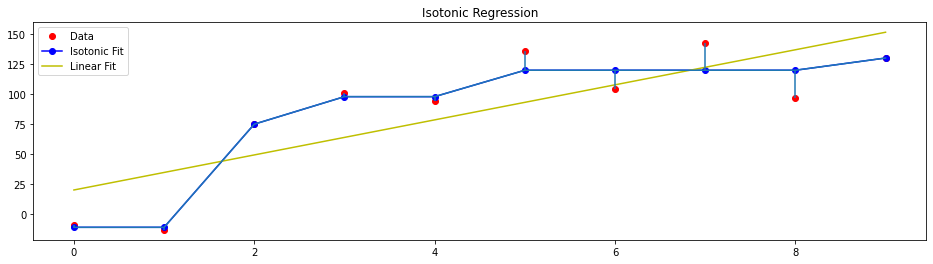

In [37]:
max_bin_num = 10
min_bin_imp = 1
min_bin_clk = 30
min_bin_step = 0.00001
train_pairs = zip(x,y)
sort_list = sorted(train_pairs, key=lambda d:d[0])
step = int(round(len(sort_list) / max_bin_num,1))
v_list = []
for i in range(max_bin_num):
    if i == max_bin_num-1:
        part = sort_list[step*i:]
    else:
        part = sort_list[step*i:step*(i+1)]
    start, end, imp, clk = part[0][0], part[-1][0], len(part), sum([v for k, v in part])
    if v_list and (start < v_list[-1][0] + min_bin_step or (v_list[-1][3] < min_bin_imp and v_list[-1][4] < min_bin_clk)):
        new_imp = v_list[-1][3] + imp
        new_clk = v_list[-1][4] + clk
        new_ctr = new_clk / float(new_imp)
        v_list[-1] = [v_list[-1][0], end, new_ctr, new_imp, new_clk]
    else:
        ctr = clk / float(imp)
        v_list.append([start, end, ctr, imp, clk])

i = 0
while i < len(v_list) - 1:
    j = len(v_list) - 1
    while j > i:
        avg_ctr = sum([v_list[k][2] for k in range(i,j+1)]) / (j+1-i)
        if avg_ctr <= v_list[i][2]:
            min_ctr, min_j = avg_ctr, j
            j2 = i + 1
            while j2 <= j:
                avg_ctr = sum([v_list[k][2] for k in range(i,j2+1)]) / (j2+1-i)
                if avg_ctr < min_ctr:
                    min_ctr, min_j = avg_ctr, j2
                j2 += 1
            for k in range(i, min_j+1):
                v_list[k][2] = min_ctr
            break
        j -= 1
    i += 1

y_pred = []

for start, end, ctr, imp, clk in v_list:
    y_pred.append(ctr)
lines=[[[i,y[i]],[i,y_pred[i]]] for i in range(n)]
lc=LineCollection(lines)
plt.figure(figsize=(16,4))
plt.plot(x,y,'r.',markersize=12)
plt.plot(x,y_pred,'b.-',markersize=12)
plt.plot(x,lr.predict(x[:, np.newaxis]), 'y-')
plt.gca().add_collection(lc)
plt.legend(('Data','Isotonic Fit','Linear Fit'))
plt.title("Isotonic Regression")
plt.plot(y_pred)
plt.show()

In [40]:
n=10 #no. of points
x=np.arange(n)
y= 50*np.log(1+x) + np.random.randint(-50,50,size=(n,))
def PAVA(x, y,min_bin_imp=1,min_bin_clk=30,min_bin_step = 0.00001):
    max_bin_num = len(x)
    train_pairs = zip(x,y)
    sort_list = sorted(train_pairs, key=lambda d:d[0])
    step = int(round(len(sort_list) / max_bin_num,1))
    v_list = [] # start, end, ctr, imp, clk
    for i in range(max_bin_num):
        if i == max_bin_num-1:
            part = sort_list[step*i:]
        else:
            part = sort_list[step*i:step*(i+1)]
        start, end, imp, clk = part[0][0], part[-1][0], len(part), sum([v for k, v in part])
        if v_list and (start < v_list[-1][0] + min_bin_step or (v_list[-1][3] < min_bin_imp and v_list[-1][4] < min_bin_clk)):
            new_imp = v_list[-1][3] + imp
            new_clk = v_list[-1][4] + clk
            new_ctr = new_clk / float(new_imp)
            v_list[-1] = [v_list[-1][0], end, new_ctr, new_imp, new_clk]
        else:
            ctr = clk / float(imp)
            v_list.append([start, end, ctr, imp, clk])

    i = 0
    while i < len(v_list) - 1:
        j = len(v_list) - 1
        while j > i:
            avg_ctr = sum([v_list[k][2] for k in range(i,j+1)]) / (j+1-i)
            if avg_ctr <= v_list[i][2]:
                # 1. if avg(nexts) < i; do something
                min_ctr, min_j = avg_ctr, j
                j2 = i + 1
                while j2 <= j:
                    avg_ctr = sum([v_list[k][2] for k in range(i,j2+1)]) / (j2+1-i)
                    if avg_ctr < min_ctr:
                        min_ctr, min_j = avg_ctr, j2
                    j2 += 1
                # 2. find min_ctr, and replace
                for k in range(i, min_j+1):
                    v_list[k][2] = min_ctr
                break
            j -= 1
        # 3. if no avg(nexts) < i; do nothing
        i += 1
    y_pred = []
    for start, end, ctr, imp, clk in v_list:
        y_pred.append(ctr)
    return y_pred

print(PAVA(x,y))

[-43.0, 68.65735902799727, 70.93061443340548, 77.66752364796699, 77.66752364796699, 77.66752364796699, 77.66752364796699, 115.91665297540138, 115.91665297540138, 133.1292546497023]


In [48]:
x = [1,2,3,20]
y = [0.5,0,0.5,1]

y3 = PAVA(x, y)
print(y3)

[0.25, 0.25, 0.5, 1.0]
